# STEP #1: IMPORT LIBRARIES AND DATASET

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

import os
import cv2
import gdown
from zipfile import ZipFile
from tensorflow.keras import layers
from tensorflow import keras
from tqdm import tqdm

In [4]:
os.makedirs("celeba_gan")
#pip install gdown

In [5]:
#os.makedirs("celeba_gan")

url = "https://drive.google.com/uc?id=1O7m1010EJjLE5QxLZiM9Fpjs7Oj6e684"
url = "https://cseweb.ucsd.edu/~weijian/static/datasets/celeba/img_align_celeba.zip"
output = "celeba_gan/data.zip"
gdown.download(url, output, quiet=True)

with ZipFile("celeba_gan/data.zip", "r") as zipobj:
    zipobj.extractall("celeba_gan")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1b26950a90>,
 <matplotlib.image.AxesImage at 0x7f1b268c7940>)

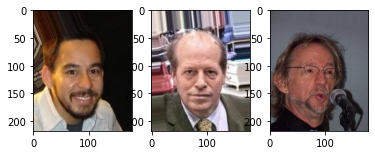

In [6]:
folder = 'celeba_gan/img_align_celeba'
samples = os.listdir(folder)
#print(samples)

img = cv2.cvtColor(cv2.imread(os.path.join(folder, np.random.choice(samples))), cv2.COLOR_BGR2RGB)
plt.subplot(131), plt.imshow(img)
img = cv2.cvtColor(cv2.imread(os.path.join(folder, np.random.choice(samples))), cv2.COLOR_BGR2RGB)
plt.subplot(132), plt.imshow(img)
img = cv2.cvtColor(cv2.imread(os.path.join(folder, np.random.choice(samples))), cv2.COLOR_BGR2RGB)
plt.subplot(133), plt.imshow(img)

In [7]:
size = 64
x, y = [],[]
t= []
i=0
for sample in tqdm(samples):
    i=i +1
    if i > 15000:
        break
    img = cv2.cvtColor(cv2.imread(os.path.join(folder, sample)), cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (size, size))
    if i > 10000:
        t.append(img)
    if i < 10000:  
        x.append(img)
  

  7%|▋         | 15000/202599 [00:09<01:58, 1583.06it/s]


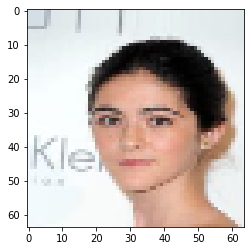

In [8]:
plt.imshow(x[0])

# Preprocessing data

In [10]:
X_train = np.array(x)/255

X_test = np.array(t)/255


In [11]:
noise_factor = 0.3

noise_dataset = []

for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_dataset.append(noisy_image)

In [12]:
noise_dataset = np.array(noise_dataset)

In [11]:
noise_dataset.shape

(9999, 64, 64, 3)

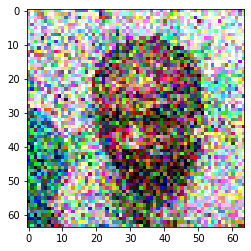

In [13]:
plt.imshow(noise_dataset[22], cmap="gray")

In [14]:
noise_test_set = []
for img in X_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_test_set.append(noisy_image)
  
noise_test_set = np.array(noise_test_set)
noise_test_set.shape

(5000, 64, 64, 3)

BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [15]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", input_shape=(64, 64, 3)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding="same"))

#Encoded image
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same"))

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=3, strides=2, activation='sigmoid', padding="same"))


In [16]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 8)         1160      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 8)         584       
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 16)       1168      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 64, 64, 3)        435       
 ranspose)                                                       
                                                                 
Total params: 3,795
Trainable params: 3,795
Non-trainabl

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
autoencoder.fit(noise_dataset.reshape(-1, 64, 64, 3),          
                X_train.reshape(-1, 64, 64, 3), 
                epochs=10, 
                batch_size=200, 
                validation_data=(noise_test_set.reshape(-1, 64, 64, 3), X_test.reshape(-1, 64, 64, 3)))


Epoch 1/10
50/50 [==============================] - 12s 57ms/step - loss: 0.6593 - val_loss: 0.5835
Epoch 2/10
50/50 [==============================] - 1s 26ms/step - loss: 0.5395 - val_loss: 0.5269
Epoch 3/10
50/50 [==============================] - 1s 26ms/step - loss: 0.5186 - val_loss: 0.5175
Epoch 4/10
50/50 [==============================] - 1s 26ms/step - loss: 0.5112 - val_loss: 0.5130
Epoch 5/10
50/50 [==============================] - 1s 26ms/step - loss: 0.5083 - val_loss: 0.5109
Epoch 6/10
50/50 [==============================] - 2s 33ms/step - loss: 0.5064 - val_loss: 0.5092
Epoch 7/10
50/50 [==============================] - 1s 26ms/step - loss: 0.5047 - val_loss: 0.5077
Epoch 8/10
50/50 [==============================] - 1s 27ms/step - loss: 0.5033 - val_loss: 0.5063
Epoch 9/10
50/50 [==============================] - 1s 27ms/step - loss: 0.5021 - val_loss: 0.5054
Epoch 10/10
50/50 [==============================] - 1s 26ms/step - loss: 0.5011 - val_loss: 0.5043


 EVALUATE TRAINED MODEL PERFORMANCE

In [18]:
evaluation = autoencoder.evaluate(noise_test_set.reshape(-1, 64, 64, 3), X_test.reshape(-1, 64, 64, 3))
print('Test Accuracy : {:.3f}'.format(evaluation))

157/157 [==============================] - 1s 5ms/step - loss: 0.5043
Test Accuracy : 0.504


In [19]:
predicted = autoencoder.predict(noise_test_set[:10].reshape(-1, 64, 64, 3))

1/1 [==============================] - 0s 146ms/step


In [20]:
predicted.shape

(10, 64, 64, 3)

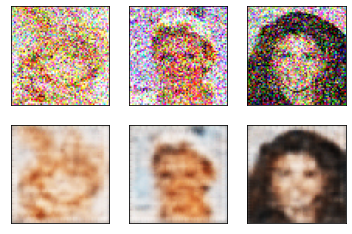

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)
for images, row in zip([noise_test_set[:3], predicted], axes):
    for img, ax in zip(images, row):
        #ax.imshow(img.reshape((64, 64)))
        ax.imshow(img.reshape((64, 64, 3)))        
        #ax.imshow(img.reshape((64, 64)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

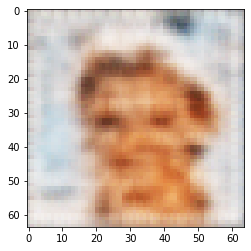

In [22]:
plt.imshow(predicted[1])

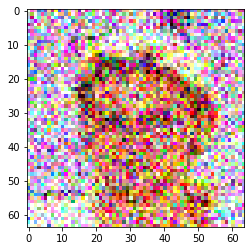

In [48]:
plt.imshow(noise_test_set[1])